# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

> Again, **don't use ChatGPT for this assignment.** You should be able to memorize the most basic parts of pandas.

## 0) Setup

Import pandas **with the correct name** .

In [332]:
import pandas as pd 

## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`. Trying `read_excel` the first time will probably not work, you'll get an error message. Be sure to read the error carefully: *you probably need to install a new library before it will work, and the error tells you what the library is named*. You *might* need to do `Kernel > Restart Kernel...` and run the notebook again from the top in order to get it to work.

In [333]:
df = pd.read_excel("richpeople.xlsx")
#df

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [334]:
df.shape

(1653, 30)

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1653 non-null   int64  
 1   name                     1653 non-null   object 
 2   rank                     1653 non-null   int64  
 3   citizenship              1653 non-null   object 
 4   countrycode              1653 non-null   object 
 5   networthusbillion        1653 non-null   float64
 6   selfmade                 1651 non-null   object 
 7   typeofwealth             1651 non-null   object 
 8   gender                   1653 non-null   object 
 9   age                      1590 non-null   float64
 10  industry                 1652 non-null   object 
 11  IndustryAggregates       1652 non-null   object 
 12  region                   1653 non-null   object 
 13  north                    1653 non-null   int64  
 14  politicalconnection     

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [336]:
df.sort_values(by="networthusbillion", ascending = False).head(10)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
184,2014,Bill Gates,1,United States,USA,76.0,self-made,founder non-finance,male,58.0,...,founder,1975.0,NaN,Microsoft,NaN,NaN,http://www.forbes.com/profile/bill-gates/,NaN,NaN,NaN
226,2014,Carlos Slim Helu,2,Mexico,MEX,72.0,self-made,privatized and resources,male,74.0,...,founder,1990.0,NaN,telecom,NaN,NaN,http://www.ozy.com/provocateurs/carlos-slims-w...,NaN,NaN,NaN
79,2014,Amancio Ortega,3,Spain,ESP,64.0,self-made,founder non-finance,male,77.0,...,founder,1975.0,NaN,retail,NaN,NaN,http://www.forbes.com/profile/amancio-ortega/,NaN,NaN,NaN
1562,2014,Warren Buffett,4,United States,USA,58.2,self-made,founder non-finance,male,83.0,...,founder,1839.0,NaN,Berkshire Hathaway,NaN,NaN,http://www.forbes.com/lists/2009/10/billionair...,http://www.forbes.com/companies/berkshire-hath...,NaN,NaN
862,2014,Larry Ellison,5,United States,USA,48.0,self-made,founder non-finance,male,69.0,...,founder,1977.0,NaN,Oracle,NaN,NaN,http://www.forbes.com/profile/larry-ellison/,http://www.businessinsider.com/how-larry-ellis...,NaN,NaN
339,2014,David Koch,6,United States,USA,40.0,inherited,inherited,male,73.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
247,2014,Charles Koch,6,United States,USA,40.0,inherited,inherited,male,78.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
1364,2014,Sheldon Adelson,8,United States,USA,38.0,self-made,self-made finance,male,80.0,...,founder,1952.0,NaN,casinos,NaN,NaN,http://www.forbes.com/profile/sheldon-adelson/,http://lasvegassun.com/news/1996/nov/26/rat-pa...,NaN,NaN
280,2014,Christy Walton,9,United States,USA,36.7,inherited,inherited,female,59.0,...,relation,1962.0,NaN,Wal-Mart,widow,NaN,http://www.forbes.com/profile/christy-walton/,NaN,NaN,NaN
724,2014,Jim Walton,10,United States,USA,34.7,inherited,inherited,male,66.0,...,relation,1962.0,NaN,Wal-Mart,inherited from father,NaN,http://www.forbes.com/profile/jim-walton/,NaN,NaN,NaN


## 4a) How many male billionaires are there compared to the number of female billionares?

> **TIP:** This is not a `.groupby`

In [337]:
df['gender'].value_counts(ascending = False)

gender
male      1473
female     180
Name: count, dtype: int64

## 4b) What percent is that?

> **TIP:** Doing percentages with the answer to `4a` is so common that there's an extra parameter to automatically calculate it. Look at the documentation!

In [338]:
gen_ct = df['gender'].value_counts(normalize=True) * 100
gen_ct

gender
male      89.110708
female    10.889292
Name: proportion, dtype: float64

## 4c) Is the average wealth different for a female billionaire as compared to a male billionaire?

> **TIP:** This one *does* use `.groupby`. You can pick what 'average' means in this context.

In [339]:
avg_wth_mean = df.groupby('gender')['networthusbillion'].mean()
avg_wth_mean

gender
female    3.920556
male      3.902716
Name: networthusbillion, dtype: float64

In [340]:
difference_mean = (avg_wth_mean['female'] - avg_wth_mean['male'])
print (difference_mean) 

0.01784000905182248


In [341]:
avg_wth_med= df.groupby('gender')['networthusbillion'].median()
avg_wth_med

gender
female    2.3
male      2.1
Name: networthusbillion, dtype: float64

In [342]:
difference_med = (avg_wth_med['female'] - avg_wth_med['male'])
print (difference_med)

0.19999999999999973


## 5a) What is the most common source/type of wealth?

In [343]:
wealth_ct_all = df['typeofwealth'].value_counts(normalize=True) * 100
wealth_ct_all = wealth_ct_all.round(2)
wealth_ct_all

typeofwealth
inherited                   30.65
founder non-finance         28.29
self-made finance           20.84
privatized and resources    11.63
executive                    8.60
Name: proportion, dtype: float64

## 5b) Is the most common source/type of wealth different between men and women?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together??? You could also do this as two separate cells where you calculate it separately for men and women.
>
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [344]:
wealth_ct_mean = df.groupby('gender')['typeofwealth'].value_counts(normalize=True) * 100
wealth_ct_mean = wealth_ct_mean.round(2)
wealth_ct_mean

gender  typeofwealth            
female  inherited                   78.89
        founder non-finance         11.67
        executive                    3.33
        self-made finance            3.33
        privatized and resources     2.78
male    founder non-finance         30.32
        inherited                   24.75
        self-made finance           22.98
        privatized and resources    12.71
        executive                    9.25
Name: proportion, dtype: float64

## 6a) What companies have the most billionaires? Let's see the top five.

> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.

In [345]:
df['company'].value_counts(ascending = False)

company
Hyatt                       11
Oetker-Gruppe                8
S. C. Johnson & Son          7
Alfa Group                   6
Votorantim Group             6
                            ..
Horten AG                    1
Midea                        1
Beijing Orient Landscape     1
MNC Group                    1
Polsat                       1
Name: count, Length: 1324, dtype: int64

In [346]:
##just for my personal interest, I want perc 
data_perc = df['company'].value_counts(normalize=True) * 100
data_perc = data_perc.round(2)
data_perc

company
Hyatt                       0.67
Oetker-Gruppe               0.49
S. C. Johnson & Son         0.43
Alfa Group                  0.36
Votorantim Group            0.36
                            ... 
Horten AG                   0.06
Midea                       0.06
Beijing Orient Landscape    0.06
MNC Group                   0.06
Polsat                      0.06
Name: proportion, Length: 1324, dtype: float64

### 6b) Graph those top 5 as a horizontal bar graph. Make the largest bar be at the top of the graph.

> **TIP:** Just try to throw `.plot()` on the end??
> 
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

<Axes: ylabel='company'>

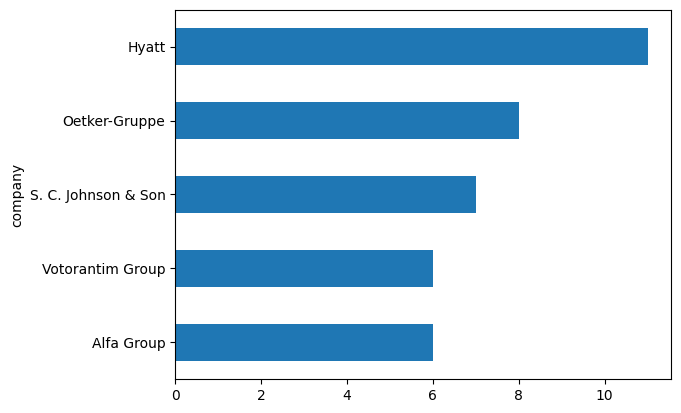

In [353]:
company_list = df['company'].value_counts().sort_values(ascending=False)
company_list.head(5).sort_values(ascending=True).plot(kind='barh')

## 7) How much money do these top 5 billionaires have in total?

> **TIP:** for multiple conditions, you can't use `or` and `and`. In pandas, `|` means *or* and `&` means *and*.
>
> **TIP:** Checking multiple conditions can be done two ways.
> - `(df['colname'] == 'A') | (df['colname'] == 'B')`
> - `df['colname'].isin(['A', 'B'])`

In [ ]:
billionaires = df['networthusbillion'].sort_values(ascending=False)[:5]
billionaires.sum()

## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [ ]:
df_sorted = df.groupby('countrycode')['networthusbillion'].sum().sort_values(ascending=False).head(10)
df_sorted

## 9a) How old is an average billionaire?

In [ ]:
avg_age = df['age'].mean()
avg_age = avg_age.round(0)
avg_age

## 9b) How old are self-made billionaires compared to non self-made billionaires? 

In [ ]:
age_self = df.groupby('selfmade')['age'].mean()
age_self.round(0) 

## 10a) Who are the three youngest billionaires? Who are the three oldest?

In [ ]:
#oldest 
age_self_old = df.sort_values(['age'], ascending= False)
age_self_old.round(0)
age_self_old.head(3)
names_old = age_self_old['name'][:3]
names_old


In [ ]:
#Youngest  
age_self_yg = df.sort_values(['age'], ascending= True)
age_self_yg .round(0)
age_self_yg .head(3)
names_old = age_self_yg['name'][:3]
names_old


## 10b) Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

In [ ]:
df['age'].value_counts().sort_index(ascending=True).plot(kind='hist')
df['age'].hist()

## 11) Make a scatterplot of net worth compared to age

It's more fun to do this in Altair as compared to matplotlib, but either is fine.

<Axes: xlabel='age', ylabel='networthusbillion'>

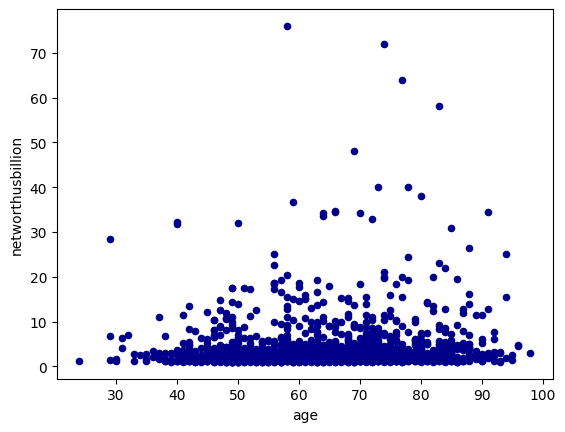

In [355]:
#df['age']['networthusbillion']

ax1 = df.plot.scatter(x='age',
                      y='networthusbillion',
                      c='DarkBlue')
ax1

## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

<Axes: xlabel='name'>

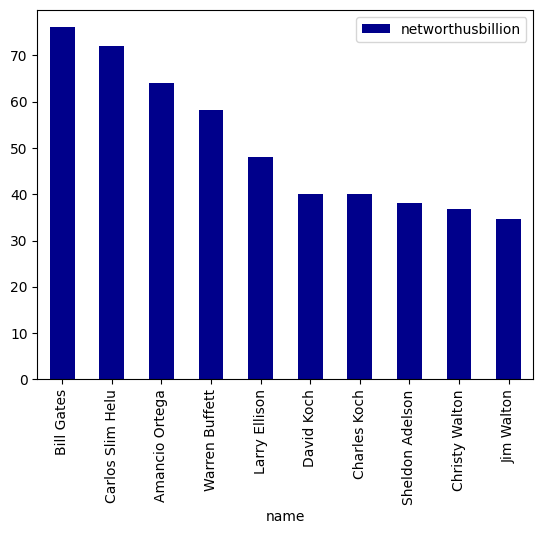

In [356]:
richest = df.sort_values(by='networthusbillion', ascending=False).head(10)
richest.plot.bar(x='name', 
                 y='networthusbillion', 
                 color='DarkBlue')

## 14) Read in the most recent data

I copied and pasted the most recent data from [the original Bloomberg story](https://www.bloomberg.com/billionaires/) (it's in the page's source code), but it all was saved as JSON. Can you use pandas to read in `billionaires.json`?

> **TIP:** If `pd.read_csv` reads a CSV and `pd.read_excel` reads an excel file... what reads in JSON?
>
> **TIP:** It's a lot less complicated than what we did in class.

In [326]:
df = pd.read_json("billionaires.json")

In [327]:
df

,commonName,commonLastName,citizenship,slug,industry,personId,rank,worth,lastChange,lastPercentChange,ytdChange,ytdPercentChange,sector,fWorth,fLastChange,fYtdChange,fLastPercentChange,fYtdPercentChange
0,Elon Musk,Musk,United States,elon-r-musk,Technology,1954518,1,221116780866,9795811154,4.64,84106712938,61.39,Technology,$221B,+$9.80B,+$84.1B,+4.6%,+61.4%
1,Bernard Arnault,Arnault,France,bernard-j-arnault,Consumer,1392853,2,170267873036,7356040557,4.52,8178459368,5.05,Consumer,$170B,+$7.36B,+$8.18B,+4.5%,+5.0%
2,Jeff Bezos,Bezos,United States,jeffrey-p-bezos,Technology,1642252,3,169556171871,3202661603,1.93,62599942079,58.53,Technology,$170B,+$3.20B,+$62.6B,+1.9%,+58.5%
3,Bill Gates,Gates,United States,william-h-gates,Technology,1390479,4,131137012631,1103482475,0.85,21900118029,20.05,Technology,$131B,+$1.10B,+$21.9B,+0.8%,+20.1%
4,Larry Ellison,Ellison,United States,lawrence-j-ellison,Technology,1491757,5,129608081535,2286642464,1.80,37780140594,41.14,Technology,$130B,+$2.29B,+$37.8B,+1.8%,+41.1%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Sofie Kirk Kristiansen,Kristiansen,Denmark,sofie-kirk-k-kristiansen,Consumer,17992920,496,5145062341,33748968,0.66,-292738682,-5.38,Consumer,$5.15B,+$33.7M,-$293M,+0.7%,-5.4%
496,Frits Goldschmeding,Goldschmeding,Netherlands,frits-j-goldschmeding,Retail,3368283,497,5136282642,154239727,3.10,-7773499,-0.15,Retail,$5.14B,+$154M,-$7.77M,+3.1%,-0.1%
497,Austen Cargill,Cargill,United States,austen-s-cargill,Commodities,1878644,498,5132489050,0,0.00,38448500,0.75,Commodities,$5.13B,$0,+$38.4M,0%,+0.8%
498,John Reece,Reece,United Kingdom,john-reece,Industrial,18070530,499,5125353358,0,0.00,1839914334,56.00,Industrial,$5.13B,$0,+$1.84B,0%,+56.0%
